In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from patsy import dmatrices

# 生成回归数据

In [58]:
from sklearn.datasets import make_regression
feature,target = make_regression(n_samples=100, n_features=5, n_informative=3, random_state=666)

# 多元线性回归

1. $y=\beta_{0}+\beta_{1}x_{1}+\cdots+\beta_{p}x_{p}+\epsilon$
2. 基本假设
   - 回归模型设定是正确的
   - 对于每个$x_{j}$,$0 < j \le k$具有变异性。同时，样本量最少满足$n \ge k+1$，且$X_{j}$之间不存在多重共线性
   - 随机干扰项条件零均值$E(\mu | X)=0$
   - 随机干扰项条件同方差与序列不相关
   - 随机干扰项正态分布

## 多重共线性检验(方差膨胀因子VIF)
- $VIF_{i}=\frac{1}{1-R_{i}^{2}}$
- 其中$R_{i}$为第$i$个变量$X_{i}$与其他全部变量$X_{j},(i=1,2,3,\cdots,k;i \ne j)$的复相关系数；

>复相关系数即可决系数$R^{2}$的算术平方根，也即拟合优度的算术平方根。
>这个可决系数$R_{i}^{2}$是指用$X_{i}$做因变量，对其他全部$X_{j},(i=1,2,3,\cdots,k;i \ne j)$做一个新的回归以后得到的可决系数。

- $VIF$通常以10作为判断边界。
  - 当$VIF < 10$,不存在多重共线性；
  - 当$10 \le VIF < 100$,存在较强的多重共线性；
  - 当$VIF \ge 100$, 存在严重多重共线性。
1. 多重共线性是普遍存在的，轻微的多重共线性问题可不采取措施。 
2. 严重的多重共线性问题，一般可根据经验或通过分析回归结果发现。如影响系数符号，重要的解释变量t值很低。要根据不同情况采取必要措施。
3. 如果模型仅用于预测，则只要拟合程度好，可不处理多重共线性问题，存在多重共线性的模型用于预测时，往往不影响预测结果。

In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 输入变量
# exog：所有解释变量
# exog_idx：解释变量的columns标签
for i in range(feature.shape[1]):
    print("第{}个解释的VIF值为{}".format(i+1,variance_inflation_factor(feature,i)))

第1个解释的VIF值为1.0617328110811086
第2个解释的VIF值为1.0557687457903961
第3个解释的VIF值为1.0178428500731205
第4个解释的VIF值为1.050193743296577
第5个解释的VIF值为1.0574752382057027


## 多重共线性处理
- 实际应用中，若存在多重共线性，需要消除多重共线性，不能直接建立多元线性回归模型；
- 待补充

# 变量间相关性分析
## 正态检验
- Pearson相关系数以及典型相关分析都要求样本数据满足正态分布的要求
- 因此首先对样本数据的正态分布进行检验
    - **JB检验**(大样本 n>30)
    - **Shapior-wilk检验**(小样本 3<n<50)
    - **KS检验**(Kolmogorov-Smirnov)

In [65]:
print("样本的数据长度：",feature.shape[0])

样本的数据长度： 100


In [66]:
from scipy import stats
# Statstic: 代表显著性水平
# P: 代表概率论与数理统计中的P值
for i in range(feature.shape[1]):
    jb_value,p = stats.jarque_bera(feature[:,i])
    if p < 0.05:
        judge = '拒绝原假设'
    else:
        judge = '接受原假设'
    print("第{}个变量的Test Statstic为{}, P值为:{}, {}".format(i,jb_value,p,judge))

第0个变量的Test Statstic为2.7153619656833254, P值为:0.25725666837334615, 接受原假设
第1个变量的Test Statstic为0.31642910793163964, P值为:0.8536666047629466, 接受原假设
第2个变量的Test Statstic为1.060720092841925, P值为:0.5883930827125226, 接受原假设
第3个变量的Test Statstic为2.678380937999782, P值为:0.26205772658847093, 接受原假设
第4个变量的Test Statstic为1.5254441447121159, P值为:0.46639513621484174, 接受原假设


## Pearson相关系数

In [67]:
pd.DataFrame(feature).corr(method='pearson')

,0,1,2,3,4
0,1.000000,-0.209959,-0.074565,-0.096902,0.026778
1,-0.209959,1.000000,-0.034239,0.062862,-0.065280
2,-0.074565,-0.034239,1.000000,-0.026433,0.122607
3,-0.096902,0.062862,-0.026433,1.000000,-0.200150
4,0.026778,-0.065280,0.122607,-0.200150,1.000000


# 建立多元回归模型

In [72]:
import statsmodels.api as sm

X = feature
Y = target 
X = sm.add_constant(X) # 添加截距项

## 拟合模型
- 如拟合结果所示$R^{2}=1$，说明拟合优度较高

In [73]:
model = sm.OLS(Y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.832e+30
Date:                Thu, 20 Jan 2022   Prob (F-statistic):               0.00
Time:                        21:12:10   Log-Likelihood:                 2778.7
No. Observations:                 100   AIC:                            -5545.
Df Residuals:                      94   BIC:                            -5530.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.275e-13   2.21e-14      5.755      0.000    8.35e-14    1.71e-13
x1            57.6078   2.08e-14   2.77e+15      0.000      57.608      57.608
x2            65.0877   2.14e-14   3.04e+15      0.000      65.088      65.088
x3            50.3106   1.97e-14   2.55e+15      0.000      50.311      50.311
x4         -9.681e-14   2.34e-14     -4.142      0.000   -1.43e-13   -5.04e-14
x5         -1.843e-13   2.36e-14     -7.813      0.000   -2.31e-13   -1.37e-13
==============================================================================
Omnibus:                        0.752   Durbin-Watson:                   2.145
Prob(Omnibus):                  0.687   Jarque-Bera (JB):                0.846
Skew:                           0.106   Prob(JB):                        0.655
Kurtosis:                       2.602   Cond. No.                         1.51
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# F检验值为3.832e+30，可以计算

In [75]:
from scipy.stats import f,t
F_Theroy = f.ppf(q=0.95, dfn=5, dfd=50-5-1)
print('F: {}'.format(F_Theroy))
T_Theroy = t.ppf(q=0.975, df=50-5-1)
print('T: {}'.format(T_Theroy))

F: 2.4270401198339058
T: 2.015367569912941


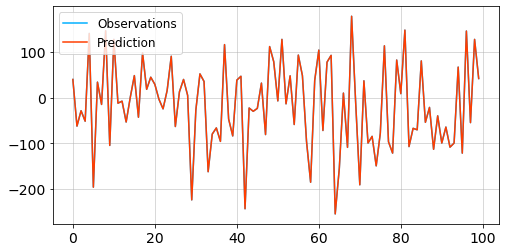

In [78]:
#绘制最佳拟合线：标签用的是训练数据的预测值y_train_pred
y_pred = model.predict(X)
fig,ax = plt.subplots(figsize=(8,4))
ax.plot(Y,color='#00b0ff',label="Observations",linewidth=1.5)
ax.plot(y_pred,color='#ff3d00',label="Prediction",linewidth=1.5)
ax.legend(loc="upper left",fontsize=12)
ax.grid(alpha=0.6)
ax.tick_params(labelsize=14)

## 异方差检验

In [87]:
from statsmodels.stats.diagnostic import spec_white

X= feature
X=sm.add_constant(X) # 添加截距项
error = model.resid  #模型的残差
print(spec_white(error,X))

(28.715219715469082, 0.0935200697563155, 20)


In [88]:
from statsmodels.stats.diagnostic import acorr_breusch_godfrey
# 自相关性检验

print("{}".format(acorr_breusch_godfrey(model)))

(99.7277943807699, 6.294999006580682e-16, 1.5158838172833338, 0.13513450995917184)
